# ADIDAS SALES ANALYSIS

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel("AdidasSalesdata.xlsx")

In [4]:
data.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Gender Type,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Day of the Week,Month Number,Month Name,Year
0,Foot Locker,1185732,2021-10-26,Northeast,Pennsylvania,Philadelphia,Men,Apparel,55,125,68750.0,24062.5,0.35,Outlet,Tuesday,10,October,2021
1,Foot Locker,1185732,2021-10-27,Northeast,Pennsylvania,Philadelphia,Women,Apparel,45,225,101250.0,30375.0,0.30,Outlet,Wednesday,10,October,2021
2,Foot Locker,1185732,2021-10-28,Northeast,Pennsylvania,Philadelphia,Men,Street Footwear,45,475,213750.0,117562.5,0.55,Outlet,Thursday,10,October,2021
3,Foot Locker,1185732,2021-10-29,Northeast,Pennsylvania,Philadelphia,Men,Athletic Footwear,45,125,56250.0,19687.5,0.35,Outlet,Friday,10,October,2021
4,Foot Locker,1185732,2021-10-30,Northeast,Pennsylvania,Philadelphia,Women,Street Footwear,35,175,61250.0,24500.0,0.40,Outlet,Saturday,10,October,2021


In [5]:
data.shape

(9648, 18)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Gender Type       9648 non-null   object        
 7   Product Category  9648 non-null   object        
 8   Price per Unit    9648 non-null   int64         
 9   Units Sold        9648 non-null   int64         
 10  Total Sales       9648 non-null   float64       
 11  Operating Profit  9648 non-null   float64       
 12  Operating Margin  9648 non-null   float64       
 13  Sales Method      9648 non-null   object        
 14  Day of the Week   9648 n

## Data Cleaning

In [8]:
data.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Gender Type', 'Product Category', 'Price per Unit', 'Units Sold',
       'Total Sales', 'Operating Profit', 'Operating Margin', 'Sales Method',
       'Day of the Week', 'Month Number', 'Month Name', 'Year'],
      dtype='object')

In [9]:
data.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Gender Type         0
Product Category    0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
Day of the Week     0
Month Number        0
Month Name          0
Year                0
dtype: int64

In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
data.drop(columns=['Retailer ID','Month Number'],inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Invoice Date      9648 non-null   datetime64[ns]
 2   Region            9648 non-null   object        
 3   State             9648 non-null   object        
 4   City              9648 non-null   object        
 5   Gender Type       9648 non-null   object        
 6   Product Category  9648 non-null   object        
 7   Price per Unit    9648 non-null   int64         
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
 13  Day of the Week   9648 non-null   object        
 14  Month Name        9648 n

## Exploratory Data Analysis

### SALES ANALYSIS

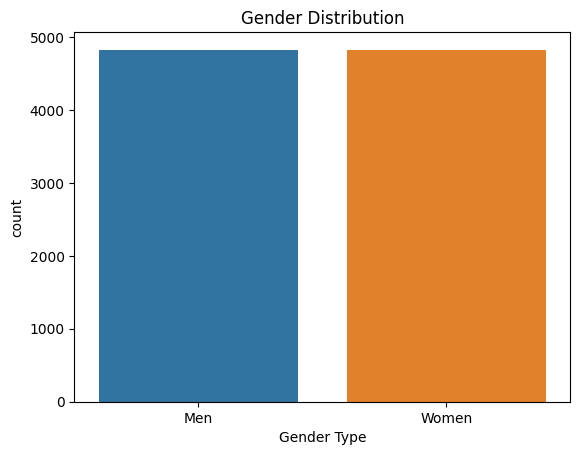

In [22]:
sns.countplot(x='Gender Type',data=data,hue='Gender Type')
plt.title("Gender Distribution");

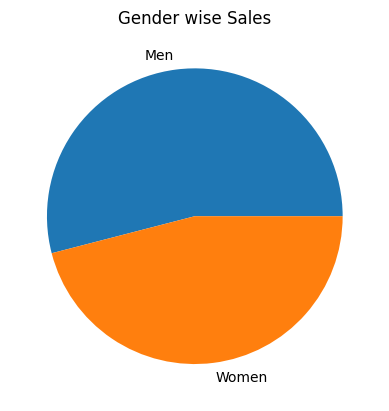

In [18]:
data.groupby('Gender Type')['Total Sales'].sum().sort_values(ascending=False).plot(kind='pie')
plt.title("Gender wise Sales")
plt.ylabel("");

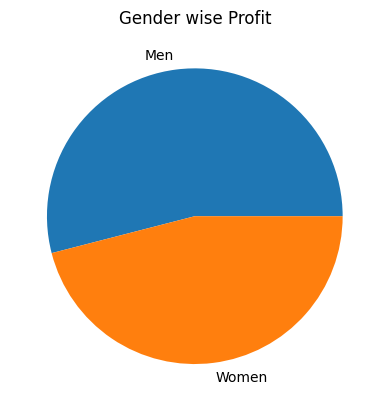

In [21]:
data.groupby('Gender Type')['Operating Profit'].sum().sort_values(ascending=False).plot(kind='pie')
plt.title("Gender wise Profit")
plt.ylabel("");

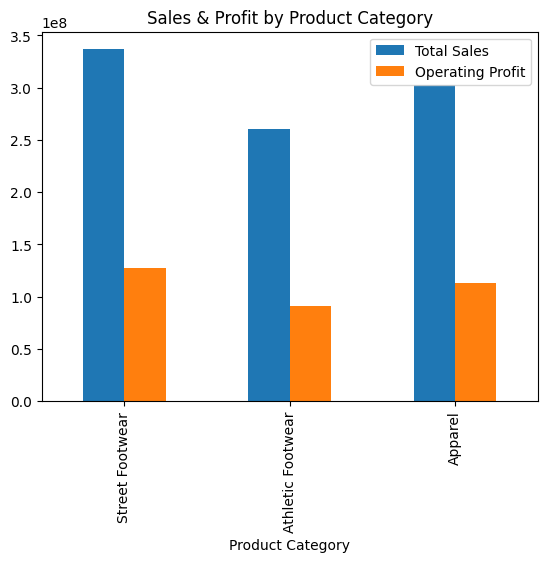

In [29]:
data.groupby("Product Category")[["Total Sales","Operating Profit"]].sum().sort_values(by='Product Category',ascending=False).plot(kind='bar')
plt.title("Sales & Profit by Product Category");

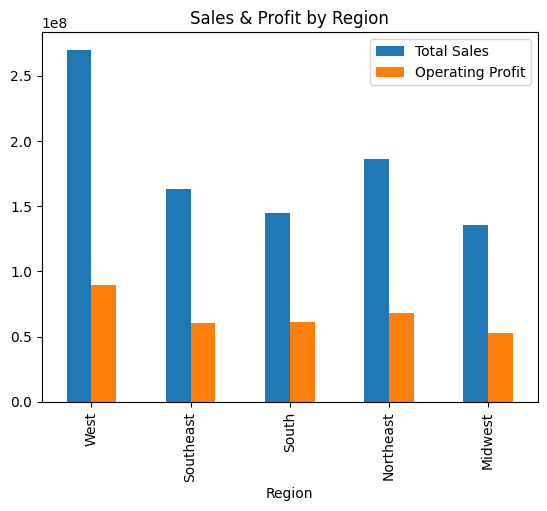

In [30]:
data.groupby("Region")[["Total Sales","Operating Profit"]].sum().sort_values(by='Region',ascending=False).plot(kind='bar')
plt.title("Sales & Profit by Region");

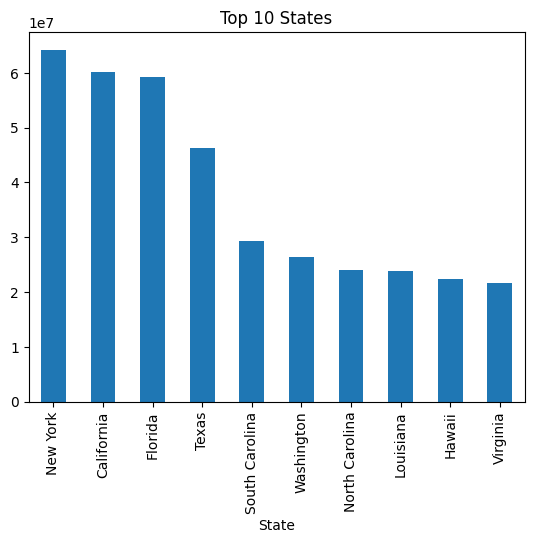

In [35]:
data.groupby("State")["Total Sales"].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 States");

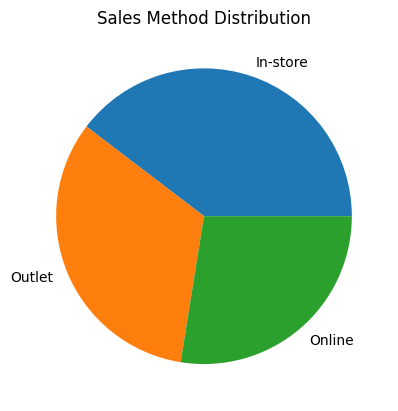

In [36]:
data.groupby('Sales Method')['Total Sales'].sum().sort_values(ascending=False).plot(kind='pie');
plt.title("Sales Method Distribution")
plt.ylabel("");

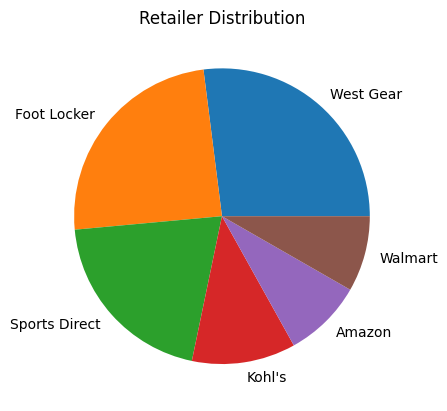

In [37]:
data.groupby('Retailer')['Total Sales'].sum().sort_values(ascending=False).plot(kind='pie');
plt.title("Retailer Distribution")
plt.ylabel("");

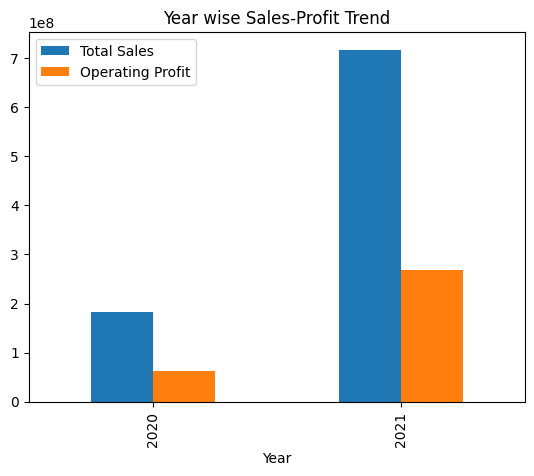

In [50]:
data.groupby("Year")[["Total Sales","Operating Profit"]].sum().sort_values(by="Year",ascending=True).plot(kind="bar")
plt.title("Year wise Sales-Profit Trend");

### PRODUCT ANALYSIS

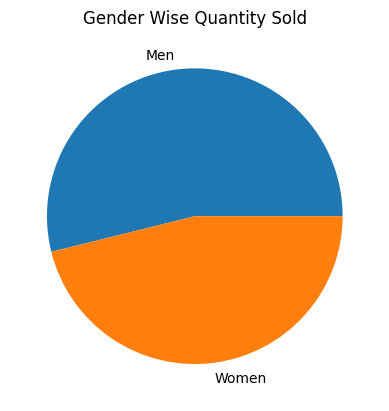

In [43]:
data.groupby("Gender Type")["Units Sold"].sum().sort_values(ascending=False).plot(kind="pie")
plt.ylabel("")
plt.title("Gender Wise Quantity Sold");

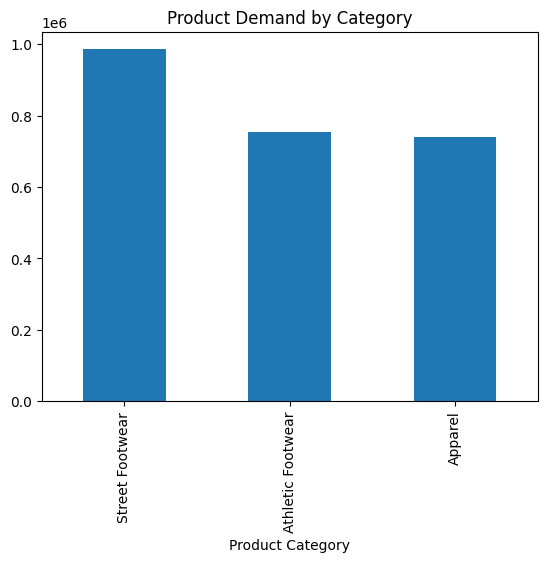

In [45]:
data.groupby("Product Category")["Units Sold"].sum().sort_values(ascending=False).plot(kind="bar")
plt.title("Product Demand by Category");

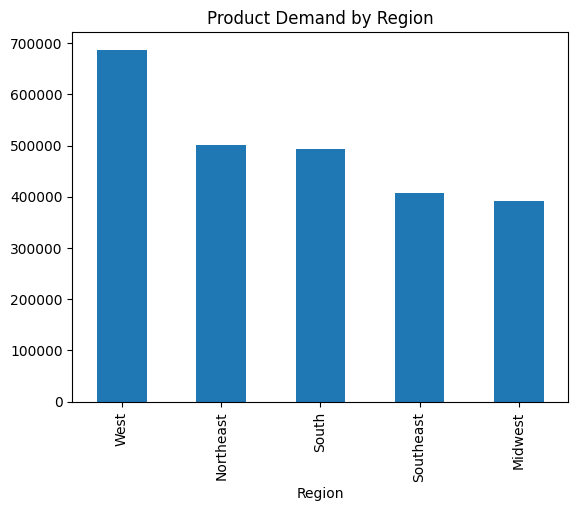

In [46]:
data.groupby("Region")["Units Sold"].sum().sort_values(ascending=False).plot(kind="bar")
plt.title("Product Demand by Region");